In [1]:
import hydra
import jax
import jax.numpy as jnp
from loguru import logger
from omegaconf import DictConfig

from jaxarc.parsers.arc_agi import ArcAgiParser
from jaxarc.utils.config import get_config
from jaxarc.utils.visualization import (
    draw_grid_svg,
    log_grid_to_console,
    save_svg_drawing,
    visualize_grid_rich,
    visualize_task_pair_rich,
    visualize_parsed_task_data_rich,
    draw_parsed_task_data_svg,
    draw_task_pair_svg,
    draw_grid_svg
)

In [2]:
cfg = get_config()

parser = ArcAgiParser(
    cfg=cfg.environment,
)

dataset_name = cfg.environment.dataset_name
dataset_year = cfg.environment.dataset_year

logger.info(f"Dataset: {dataset_name} ({dataset_year})")
logger.info(f"Description: {cfg.environment.description}")
logger.info(f"Available tasks: {len(parser.get_available_task_ids())}")

2025-06-15 10:32:13.536 | INFO     | jaxarc.parsers.arc_agi:_load_and_cache_tasks:70 - Loaded 400 tasks from /Users/aadam/workspace/JaxARC/data/raw/arc-prize-2024/arc-agi_training_challenges.json
2025-06-15 10:32:13.543 | INFO     | jaxarc.parsers.arc_agi:_load_and_cache_tasks:84 - Loaded solutions from /Users/aadam/workspace/JaxARC/data/raw/arc-prize-2024/arc-agi_training_solutions.json
2025-06-15 10:32:13.544 | INFO     | jaxarc.parsers.arc_agi:_load_and_cache_tasks:108 - Cached 400 tasks in memory
2025-06-15 10:32:13.544 | INFO     | __main__:<module>:10 - Dataset: ARC-AGI-1 (2024)
2025-06-15 10:32:13.544 | INFO     | __main__:<module>:11 - Description: ARC-AGI-1 dataset (2024) for abstract reasoning tasks
2025-06-15 10:32:13.545 | INFO     | __main__:<module>:12 - Available tasks: 400
2025-06-15 10:32:13.543 | INFO     | jaxarc.parsers.arc_agi:_load_and_cache_tasks:84 - Loaded solutions from /Users/aadam/workspace/JaxARC/data/raw/arc-prize-2024/arc-agi_training_solutions.json
2025-

In [3]:
 # Get a random task
key = jax.random.PRNGKey(42)
try:
    parsed_task = parser.get_random_task(key)
    logger.info(f"Successfully parsed task: {parsed_task.task_id}")
    logger.info(f"Number of training pairs: {parsed_task.num_train_pairs}")
    logger.info(f"Number of test pairs: {parsed_task.num_test_pairs}")
    logger.info(f"Input grids shape: {parsed_task.input_grids_examples.shape}")
    logger.info(f"Output grids shape: {parsed_task.output_grids_examples.shape}")
    logger.info(f"Test input grids shape: {parsed_task.test_input_grids.shape}")
except Exception as e:
    logger.error(f"Error parsing task: {e}")
    raise

2025-06-15 10:32:14.263 | DEBUG    | jaxarc.parsers.utils:log_parsing_stats:197 - Task 1a07d186: 3 train pairs, 1 test pairs, max grid size: 19x26
2025-06-15 10:32:14.264 | INFO     | __main__:<module>:5 - Successfully parsed task: 1a07d186
2025-06-15 10:32:14.264 | INFO     | __main__:<module>:6 - Number of training pairs: 3
2025-06-15 10:32:14.264 | INFO     | __main__:<module>:7 - Number of test pairs: 1
2025-06-15 10:32:14.265 | INFO     | __main__:<module>:8 - Input grids shape: (10, 30, 30)
2025-06-15 10:32:14.265 | INFO     | __main__:<module>:9 - Output grids shape: (10, 30, 30)
2025-06-15 10:32:14.265 | INFO     | __main__:<module>:10 - Test input grids shape: (3, 30, 30)
2025-06-15 10:32:14.264 | INFO     | __main__:<module>:5 - Successfully parsed task: 1a07d186
2025-06-15 10:32:14.264 | INFO     | __main__:<module>:6 - Number of training pairs: 3
2025-06-15 10:32:14.264 | INFO     | __main__:<module>:7 - Number of test pairs: 1
2025-06-15 10:32:14.265 | INFO     | __main__:

In [4]:
task_data = parser.get_task_by_id("00d62c1b")

visualize_parsed_task_data_rich(
    task_data,
    show_test=True,
    show_coordinates=False,
    show_numbers=False,
    double_width=True,
)

2025-06-15 10:32:14.483 | DEBUG    | jaxarc.parsers.utils:log_parsing_stats:197 - Task 00d62c1b: 5 train pairs, 1 test pairs, max grid size: 20x20


Task: 00d62c1b

Training pairs: 5

Test pairs: 1

Training Example 1

  Input 1   
   (6x6)    
████████████
████████████
████████████
████████████
████████████
████████████

  Output 1  
   (6x6)    
████████████
████████████
████████████
████████████
████████████
████████████

Training Example 2

  Input 2 (10x10)   
████████████████████
████████████████████
████████████████████
████████████████████
████████████████████
████████████████████
████████████████████
████████████████████
████████████████████
████████████████████

  Output 2 (10x10)  
████████████████████
████████████████████
████████████████████
████████████████████
████████████████████
████████████████████
████████████████████
████████████████████
████████████████████
████████████████████

Training Example 3

  Input 3 (10x10)   
████████████████████
████████████████████
████████████████████
████████████████████
████████████████████
████████████████████
████████████████████
████████████████████
████████████████████
████████████████████

  Output 3 (10x10)  
████████████████████
████████████████████
████████████████████
████████████████████
████████████████████
████████████████████
████████████████████
████████████████████
████████████████████
████████████████████

Training Example 4

  Input 4 (10x10)   
████████████████████
████████████████████
████████████████████
████████████████████
████████████████████
████████████████████
████████████████████
████████████████████
████████████████████
████████████████████

  Output 4 (10x10)  
████████████████████
████████████████████
████████████████████
████████████████████
████████████████████
████████████████████
████████████████████
████████████████████
████████████████████
████████████████████

Training Example 5

            Input 5 (20x20)             
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████

            Output 5 (20x20)            
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████

Test Example 1

          Test Input 1 (20x20)          
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████

  Test Output 1 (Ground Truth) (20x20)  
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████

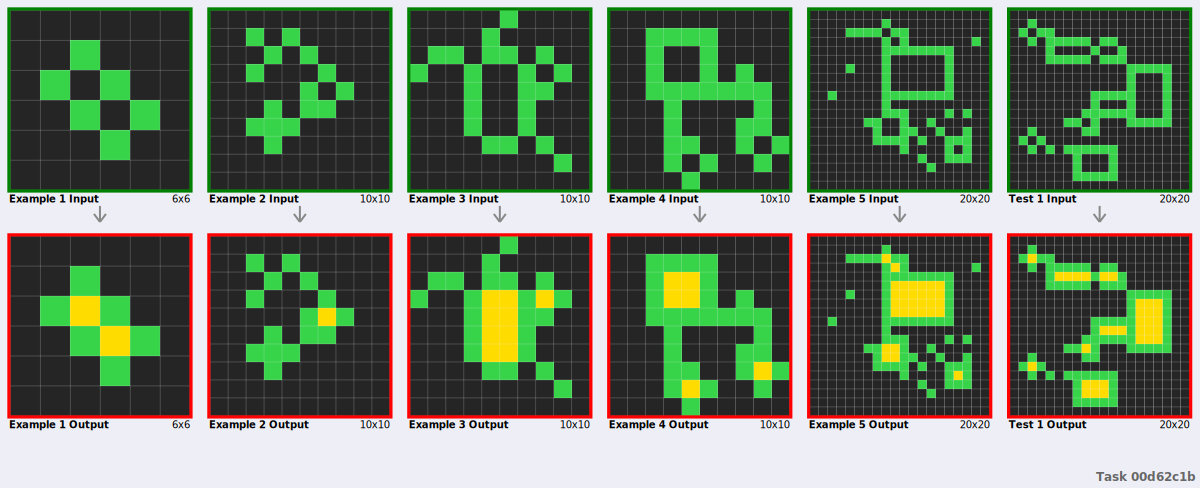

In [15]:
draw_parsed_task_data_svg(
    task_data,
    include_test="all",
    border_colors=("green", "red"),
    width=30,
    height=12
)

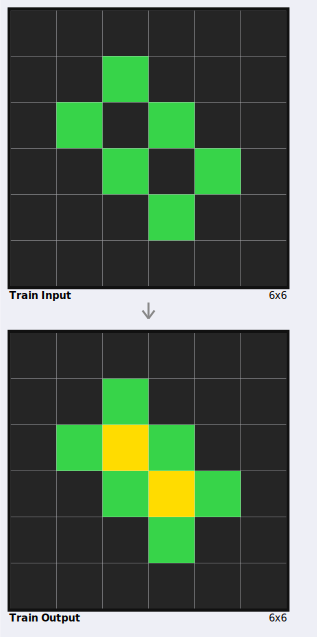

In [12]:
draw_task_pair_svg(
    task_data.input_grids_examples[0],
    task_data.output_grids_examples[0],
    task_data.input_masks_examples[0],
    task_data.output_masks_examples[0],
    width=10,
    height=15,
    label="Train",
)

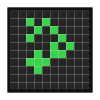

In [13]:
draw_grid_svg(
    task_data.input_grids_examples[1],
    task_data.input_masks_examples[1],
    max_width=2,
    max_height=2,
    # label="Train Input",
    show_size=False,
    extra_bottom_padding=0
)

In [7]:
visualize_task_pair_rich(
    task_data.input_grids_examples[0],
    task_data.output_grids_examples[0],
    task_data.input_masks_examples[0],
    task_data.output_masks_examples[0],
)[1]

Task Pair - 
Output (6x6)
████████████
████████████
████████████
████████████
████████████
████████████